In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd

/content


### Import

In [8]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
import tensorflow
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from PIL import Image
import glob

from google.colab import files
import joblib
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model


### Verify Image

In [ ]:
image_list = []
for filename in glob.glob('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/*.jpg'): 
    im = Image.open(filename)
    image_list.append(im)
    
print(image_list)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F5042890FD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F5042890C90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288DED0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D310>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D050>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D950>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D290>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D8D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288DE90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D150>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288DC90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D1D0>, <PIL.JpegImagePlugin.JpegIm

In [ ]:
image_list_0 = np.array(image_list[0])
image_list_0.shape

(32, 32, 3)

### Load Dataset 1

In [16]:
from pathlib import Path
import cv2
from google.colab.patches import cv2_imshow
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

datapath = Path('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32')
data_dir = sorted([x for x in datapath.iterdir()], key=lambda x: int(x.stem))
print(data_dir)

data = []
label = []

for dir_path in data_dir :
  for i , filename in enumerate(os.listdir(dir_path)):
    img = cv2.imread(os.path.join(dir_path,filename))
    img = cv2.resize(img, (32, 32))
    data.append(img)
    label.append([int(dir_path.stem)-2])

data2 = np.array(data)
data = np.array(data).astype(np.float32()) / 255.0
label = np.array(label).reshape(-1,1)

print("train",data.shape)
print("train_label",label.shape)
print("train",label.dtype)
train_X, test_X, train_y, test_y = train_test_split(data, label, train_size= 0.8)

[PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/3'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/4'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/5'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/6'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/7'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/8'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/9'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/10'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/11'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品

In [ ]:
data2.shape
# print(data2[0])
# np.min(data2[0])
# plt.imshow(data2[0])
cv2_imshow(data2[0])
plt.imshow(cv2.cvtColor(data2[0], cv2.COLOR_BGR2RGB))

In [ ]:
data.shape
# print(data[0])
# np.min(data)
# plt.imshow(data[0])
cv2_imshow(data[0])
plt.imshow(cv2.cvtColor(data[0], cv2.COLOR_BGR2RGB))

### Load Dataset 2

In [ ]:
batch_size = 32
img_height = 32
img_width = 32

directory = '/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/'

train_ds = tensorflow.keras.utils.image_dataset_from_directory(
  directory,
  class_names=None,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  follow_links=False,
  crop_to_aspect_ratio=False,
  batch_size=batch_size)

val_ds = tensorflow.keras.utils.image_dataset_from_directory(
  directory,
  class_names=None,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  follow_links=False,
  crop_to_aspect_ratio=False,
  batch_size=batch_size)

Found 5869 files belonging to 11 classes.
Using 4696 files for training.
Found 5869 files belonging to 11 classes.
Using 1173 files for validation.


In [ ]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
class_names = sorted( train_ds.class_names, key = lambda x:int(x) )
print(class_names)

['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


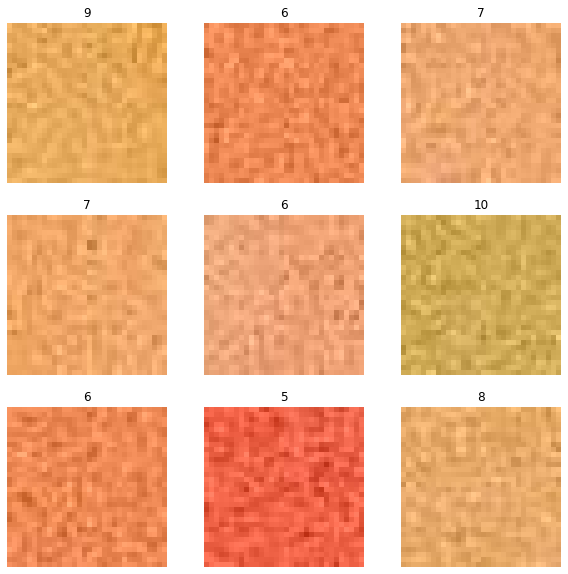

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
count = 0
for images, labels in train_ds.take(-1):
  count = count + 1 
  print(count)

**Train Data**

In [ ]:
train_ls = list(train_ds)

In [ ]:
len(train_ls)
# np.stack(train_np)
print(train_ls[0][0].shape)   

train_np_ds = train_ls[0][0]    # train_ls[0][0] : train data ;  train_ls[0][1] : train label
for i in range(1, len(train_ls)):
  train_np_ds = np.concatenate((train_ls[i][0], train_np_ds), axis=0)
train_np_ds.shape

(32, 32, 32, 3)


(4696, 32, 32, 3)

In [ ]:
# print(train_np_ds[0])
# plt.imshow(int(train_np_ds[0]))

**Train Label**

In [ ]:
train_np_label_ds = train_ls[0][1]    
for i in range(1, len(train_ls)):
  train_np_label_ds = np.concatenate((train_ls[i][1], train_np_label_ds), axis=0)
# train_np_label_ds.shape

In [ ]:
train_np_label_ds = train_np_label_ds.reshape(train_np_label_ds.shape[0], 1)
train_np_label_ds.shape

(4696, 1)

**Split VAL & Test Data**

In [ ]:
val_ls = list(val_ds)

In [ ]:
val_np_ds = val_ls[0][0]
for i in range(1, len(val_ls)):
  val_np_ds = np.concatenate((val_ls[i][0], val_np_ds), axis=0)
val_np_ds.shape

n = len(val_np_ds)//2
test_np_ds = val_np_ds[n:]
val_np_ds = val_np_ds[:n]

In [ ]:
print(val_np_ds.shape, test_np_ds.shape)

(586, 32, 32, 3) (587, 32, 32, 3)


**Split VAL & Test Label**

In [ ]:
val_np_label_ds = val_ls[0][1]
for i in range(1, len(val_ls)):
  val_np_label_ds = np.concatenate((val_ls[i][1], val_np_label_ds), axis=0)
val_np_label_ds.shape

n = len(val_np_label_ds)//2
test_np_label_ds = val_np_label_ds[n:]
val_np_label_ds = val_np_label_ds[:n]

In [ ]:
val_np_label_ds = val_np_label_ds.reshape(val_np_label_ds.shape[0], 1)
test_np_label_ds = test_np_label_ds.reshape(test_np_label_ds.shape[0], 1)
print(val_np_label_ds.shape, test_np_label_ds.shape)

(586, 1) (587, 1)


In [ ]:
train_X_2 = train_np_ds
train_ground = train_np_ds

valid_X_2 = val_np_ds
valid_ground = val_np_ds

In [ ]:
train_X_2.dtype, valid_X_2.dtype
np.max(train_X_2), np.max(valid_X_2)
train_X_2 = train_X_2 / np.max(train_X_2)
valid_X_2 = valid_X_2 / np.max(valid_X_2)
np.max(train_X_2), np.max(valid_X_2)

(1.0, 1.0)

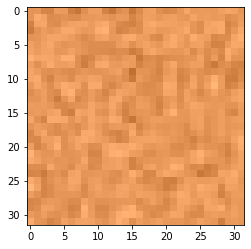

In [ ]:
plt.imshow(train_X_2[0])

## AutoEncoder

### AutoEncoder Model

#### AE1

In [ ]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #16 x 16 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #8 x 8 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #8 x 8 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 3
    return decoded

#### AE2_encode ONE dim

In [ ]:
def encoder2(input_img):

    encoding_dim = 1

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)

    return encoder_output

def decoder2(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    # conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2) # 32 x 32 x 32
    # conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='relu', padding='same')(up2) #32 x 32 x 3
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

#### AE2_encode Two dim

In [ ]:
def encoder3(input_img):

    encoding_dim = 2

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='tanh', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='tanh', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='tanh', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)
    
    return encoder_output

def decoder3(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='tanh', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='tanh', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    conv7 = Conv2D(32, (3, 3), activation='tanh', padding='same')(up2) # 32 x 32 x 32
    conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2)
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

In [ ]:
def encoder3(input_img):

    encoding_dim = 2

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)
    
    return encoder_output

def decoder3(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2) # 32 x 32 x 32
    conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='relu', padding='same')(up2)
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

### Training Model

In [ ]:
batch_size = 32
epochs = 50
inChannel = 3
x, y = 32, 32
input_img = Input(shape = (x, y, inChannel))

In [ ]:
autoencoder = Model(input_img, decoder3(encoder3(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=1e-3))
# autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop(learning_rate=1e-3))

(None, 2)
(None, 32, 32, 3)


In [ ]:
encoder_bottleneck = Model(input_img, encoder3(input_img))

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256   

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_X, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

# autoencoder_train = autoencoder.fit(train_X_2, train_X_2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X_2, valid_X_2))

Epoch 1/50
118/118 [==============================] - 14s 14ms/step - loss: 1.0578 - val_loss: 0.0439
Epoch 2/50
118/118 [==============================] - 1s 9ms/step - loss: 0.8029 - val_loss: 0.2694
Epoch 3/50
118/118 [==============================] - 1s 9ms/step - loss: 0.5736 - val_loss: 0.3876
Epoch 4/50
118/118 [==============================] - 1s 8ms/step - loss: 0.4205 - val_loss: 0.2398
Epoch 5/50
118/118 [==============================] - 1s 8ms/step - loss: 0.2935 - val_loss: 0.2020
Epoch 6/50
118/118 [==============================] - 1s 8ms/step - loss: 0.1830 - val_loss: 0.0590
Epoch 7/50
118/118 [==============================] - 1s 8ms/step - loss: 0.0830 - val_loss: 0.0529
Epoch 8/50
118/118 [==============================] - 1s 9ms/step - loss: 0.0475 - val_loss: 0.0217
Epoch 9/50
118/118 [==============================] - 1s 8ms/step - loss: 0.0262 - val_loss: 0.0197
Epoch 10/50
118/118 [==============================] - 1s 8ms/step - loss: 0.0230 - val_loss: 0.03

### Save model

In [5]:
from google.colab import files
import joblib

In [ ]:
autoencoder.save("/content/PEPE_AE_2.h5")
files.download('/content/PEPE_AE_2.h5')

joblib.dump(autoencoder_train, '/content/PEPE_AE_train_history_2')
files.download('/content/PEPE_AE_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
encoder_bottleneck.save("/content/PEPE_AE_bottle_twodim.h5")
files.download('/content/PEPE_AE_bottle_twodim.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load AE model

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [6]:
autoencoder = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_model/0926/PEPE_AE_2.h5')
autoencoder_train = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_model/0926/PEPE_AE_train_history_2')
encoder_bottleneck = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_model/0926/PEPE_AE_bottle_twodim.h5')

### Evaluate model

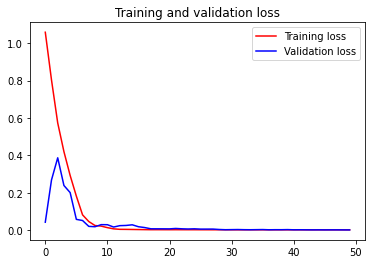

In [9]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
mse = tensorflow.keras.losses.MeanSquaredError()
for i, value in enumerate(test_X):
  pre_img = autoencoder.predict(test_X[i:i+1])
  print(mse(test_X[i:i+1], pre_img).numpy())

In [ ]:
mse = tensorflow.keras.losses.MeanSquaredError()
print(mse(train_X[1:2], pre_img).numpy())

0.0019166303


In [ ]:
test_y[0]

array([3])

In [ ]:
test_np_label_ds_reshape= test_y.reshape(-1)
test_np_label_ds_reshape

array([3, 9, 4, ..., 2, 5, 3])

In [ ]:
test_X.shape

(1174, 32, 32, 3)

Bottle neck info

In [ ]:
encoded_imgs = encoder_bottleneck.predict(test_X)

In [ ]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(encoded_imgs, test_y):
  if l[0] == 0:
    class2.append([t[0],l[0]])
  elif l[0] == 1:
    class3.append([t[0],l[0]])
  elif l[0] == 2:
    class4.append([t[0],l[0]])
  elif l[0] == 3:
    class5.append([t[0],l[0]])
  elif l[0] == 4:
    class6.append([t[0],l[0]])
  elif l[0] == 5:
    class7.append([t[0],l[0]])
  elif l[0] == 6:
    class8.append([t[0],l[0]])    
  elif l[0] == 7:
    class9.append([t[0],l[0]])
  elif l[0] == 8:
    class10.append([t[0],l[0]])
  elif l[0] == 9:
    class11.append([t[0],l[0]])
  elif l[0] == 10:
    class12.append([t[0],l[0]])


print('ph 2 : ')
print("mean:", np.mean(np.array(class2)[:,0]))
print("srd:", np.std(np.array(class2)[:,0]))
# print(class2)

print('-------------------')
print('ph 3 : ')
print("mean:", np.mean(np.array(class3)[:,0]))
print("srd:", np.std(np.array(class3)[:,0]))
# print(class3)

print('-------------------')
print('ph 4 : ')
print("mean:", np.mean(np.array(class4)[:,0]))
print("srd:", np.std(np.array(class4)[:,0]))
# print(class4)

print('-------------------')
print('ph 5 : ')
print("mean:", np.mean(np.array(class5)[:,0]))
print("srd:", np.std(np.array(class5)[:,0]))
# print(class5)

print('-------------------')
print('ph 6 : ')
print("mean:", np.mean(np.array(class6)[:,0]))
print("srd:", np.std(np.array(class6)[:,0]))
# print(class6)

print('-------------------')
print('ph 7 : ')
print("mean:", np.mean(np.array(class7)[:,0]))
print("srd:", np.std(np.array(class7)[:,0]))
# print(class7)

print('-------------------')
print('ph 8 : ')
print("mean:", np.mean(np.array(class8)[:,0]))
print("srd:", np.std(np.array(class8)[:,0]))
# print(class8)

print('-------------------')
print('ph 9 : ')
print("mean:", np.mean(np.array(class9)[:,0]))
print("srd:", np.std(np.array(class9)[:,0]))
# print(class9)

print('-------------------')
print('ph 10 : ')
print("mean:", np.mean(np.array(class10)[:,0]))
print("srd:", np.std(np.array(class10)[:,0]))
# print(class10)

print('-------------------')
print('ph 11 : ')
print("mean:", np.mean(np.array(class11)[:,0]))
print("srd:", np.std(np.array(class11)[:,0]))
# print(class11)

print('-------------------')
print('ph 12 : ')
print("mean:", np.mean(np.array(class12)[:,0]))
print("srd:", np.std(np.array(class12)[:,0]))
# print(class12)

ph 2 : 
mean: -8.404033568170336
srd: 0.9555242207531742
-------------------
ph 3 : 
mean: -9.347907208046824
srd: 3.035038374088315
-------------------
ph 4 : 
mean: 22.03895886462668
srd: 5.524417550763212
-------------------
ph 5 : 
mean: 23.037235960668447
srd: 4.1964638934880005
-------------------
ph 6 : 
mean: 33.85230439340966
srd: 10.308035829053743
-------------------
ph 7 : 
mean: 5.345995471874873
srd: 3.0672320537657987
-------------------
ph 8 : 
mean: -4.9528659403972
srd: 16.835777706143197
-------------------
ph 9 : 
mean: -12.016042392627865
srd: 11.899608784423977
-------------------
ph 10 : 
mean: -6.192269270769273
srd: 2.964400868560431
-------------------
ph 11 : 
mean: 1.2962695221291283
srd: 1.403147802067531
-------------------
ph 12 : 
mean: -7.603341462545925
srd: 2.264685676016918


In [ ]:
encoded_imgs[0]

array([ -5.852629, -31.16488 ], dtype=float32)

PLOT

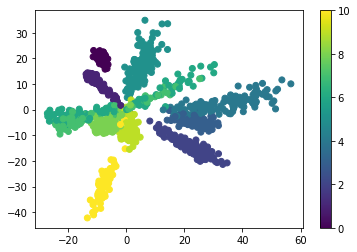

In [ ]:
# plotting
# encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c = test_y)
plt.colorbar()
plt.show()

###AE Decode Image (Predict) 

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
# AE_image_crop_test_ph12 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_3.jpg")
# AE_image_crop_test_ph11 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/11/ph11_3.jpg")
# AE_image_crop_test_ph10 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/10/ph10_3.jpg")
# AE_image_crop_test_ph9 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/9/ph9_3.jpg")
# AE_image_crop_test_ph8 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/8/ph8_3.jpg")
# AE_image_crop_test_ph7 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/7/ph7_3.jpg")
# AE_image_crop_test_ph6 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/6/ph6_3.jpg")
# AE_image_crop_test_ph5 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/5/ph5_3.jpg")
# AE_image_crop_test_ph4 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/4/ph4_3.jpg")
# AE_image_crop_test_ph3 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/3/ph3_3.jpg")
# AE_image_crop_test_ph2 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/ph2_3.jpg")

AE_image_crop_test_ph12 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_3.jpg")
AE_image_crop_test_ph11 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/11/ph11_3.jpg")
AE_image_crop_test_ph10 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/10/ph10_3.jpg")
AE_image_crop_test_ph9 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/9/ph9_3.jpg")
AE_image_crop_test_ph8 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/8/ph8_3.jpg")
AE_image_crop_test_ph7 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/7/ph7_3.jpg")
AE_image_crop_test_ph6 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/6/ph6_3.jpg")
AE_image_crop_test_ph5 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/5/ph5_3.jpg")
AE_image_crop_test_ph4 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/4/ph4_3.jpg")
AE_image_crop_test_ph3 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/3/ph3_3.jpg")
AE_image_crop_test_ph2 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/ph2_3.jpg")

(1, 32, 32, 3)


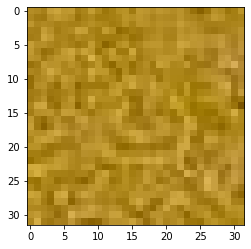

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph12, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)

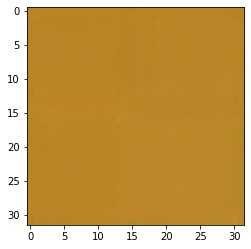

In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255

AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)

# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph12 = encoder_bottleneck.predict(np_AE_image_crop_test_ph12_norm)
print(bottleneck_ph12)

[[-0.2049053  -0.30287898]]


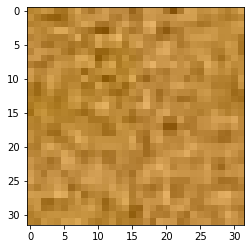

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph11, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph11 = np.array(AE_image_crop_test_ph11)
np_AE_image_crop_test_ph11 = np_AE_image_crop_test_ph11.reshape(1, 32, 32, 3)

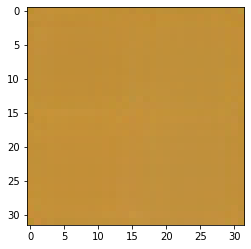

In [ ]:
np_AE_image_crop_test_ph11_norm = np_AE_image_crop_test_ph11 / 255

AE_test_ph11 = autoencoder.predict(np_AE_image_crop_test_ph11_norm)

# print(AE_test_ph12)
AE_test_ph11 = AE_test_ph11.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph11, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph11 = encoder_bottleneck.predict(np_AE_image_crop_test_ph11_norm)
print(bottleneck_ph11)

[[-0.18041298 -0.30038422]]


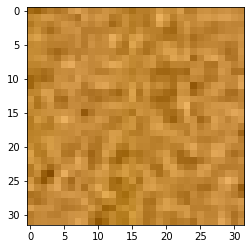

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph10, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph10 = np.array(AE_image_crop_test_ph10)
np_AE_image_crop_test_ph10 = np_AE_image_crop_test_ph10.reshape(1, 32, 32, 3)

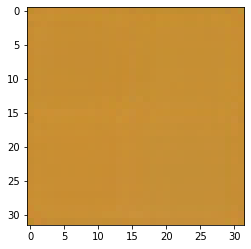

In [ ]:
np_AE_image_crop_test_ph10_norm = np_AE_image_crop_test_ph10 / 255

AE_test_ph10 = autoencoder.predict(np_AE_image_crop_test_ph10_norm)

# print(AE_test_ph12)
AE_test_ph10 = AE_test_ph10.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph10, cv2.COLOR_BGR2RGB))


In [ ]:
bottleneck_ph10 = encoder_bottleneck.predict(np_AE_image_crop_test_ph10_norm)
print(bottleneck_ph10)

[[-0.22324158 -0.3041331 ]]


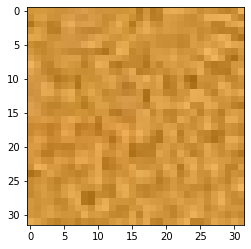

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph9, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph9 = np.array(AE_image_crop_test_ph9)
np_AE_image_crop_test_ph9 = np_AE_image_crop_test_ph9.reshape(1, 32, 32, 3)

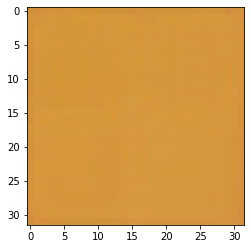

In [ ]:
np_AE_image_crop_test_ph9_norm = np_AE_image_crop_test_ph9 / 255

AE_test_ph9 = autoencoder.predict(np_AE_image_crop_test_ph9_norm)

# print(AE_test_ph12)
AE_test_ph9 = AE_test_ph9.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph9, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph9 = encoder_bottleneck.predict(np_AE_image_crop_test_ph9_norm)
print(bottleneck_ph9)

[[-0.21224758 -0.31415176]]


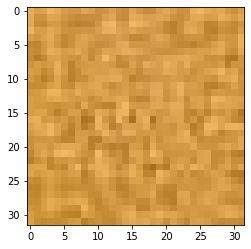

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph8, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph8 = np.array(AE_image_crop_test_ph8)
np_AE_image_crop_test_ph8 = np_AE_image_crop_test_ph8.reshape(1, 32, 32, 3)

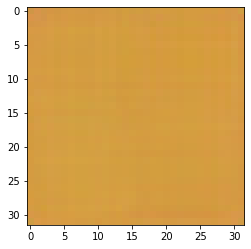

In [ ]:
np_AE_image_crop_test_ph8_norm = np_AE_image_crop_test_ph8 / 255

AE_test_ph8 = autoencoder.predict(np_AE_image_crop_test_ph8_norm)

# print(AE_test_ph12)
AE_test_ph8 = AE_test_ph8.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph8, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph8 = encoder_bottleneck.predict(np_AE_image_crop_test_ph8_norm)
print(bottleneck_ph8)

[[-0.22694063 -0.32031316]]


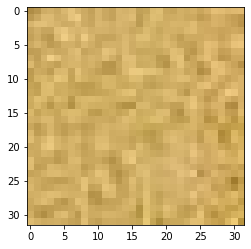

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph7, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph7 = np.array(AE_image_crop_test_ph7)
np_AE_image_crop_test_ph7 = np_AE_image_crop_test_ph7.reshape(1, 32, 32, 3)

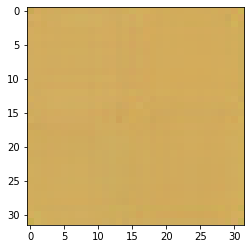

In [ ]:
np_AE_image_crop_test_ph7_norm = np_AE_image_crop_test_ph7 / 255

AE_test_ph7 = autoencoder.predict(np_AE_image_crop_test_ph7_norm)

# print(AE_test_ph12)
AE_test_ph7 = AE_test_ph7.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph7, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph7 = encoder_bottleneck.predict(np_AE_image_crop_test_ph7_norm)
print(bottleneck_ph7)

[[-0.2326297  -0.32382745]]


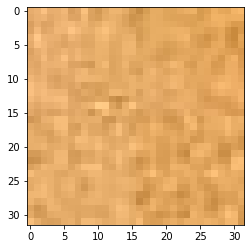

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph6, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph6 = np.array(AE_image_crop_test_ph6)
np_AE_image_crop_test_ph6 = np_AE_image_crop_test_ph6.reshape(1, 32, 32, 3)

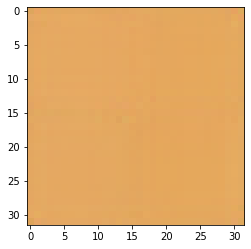

In [ ]:
np_AE_image_crop_test_ph6_norm = np_AE_image_crop_test_ph6 / 255

AE_test_ph6 = autoencoder.predict(np_AE_image_crop_test_ph6_norm)

# print(AE_test_ph12)
AE_test_ph6 = AE_test_ph6.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph6, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph6 = encoder_bottleneck.predict(np_AE_image_crop_test_ph6_norm)
print(bottleneck_ph6)

[[-0.24738066 -0.32196683]]


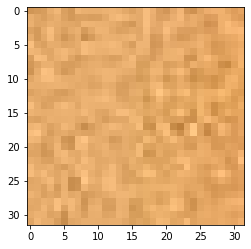

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph5, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph5 = np.array(AE_image_crop_test_ph5)
np_AE_image_crop_test_ph5 = np_AE_image_crop_test_ph5.reshape(1, 32, 32, 3)

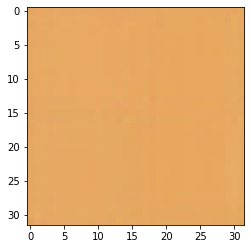

In [ ]:
np_AE_image_crop_test_ph5_norm = np_AE_image_crop_test_ph5 / 255

AE_test_ph5 = autoencoder.predict(np_AE_image_crop_test_ph5_norm)

# print(AE_test_ph12)
AE_test_ph5 = AE_test_ph5.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph5, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph5 = encoder_bottleneck.predict(np_AE_image_crop_test_ph5_norm)
print(bottleneck_ph5)

[[-0.24263428 -0.32821706]]


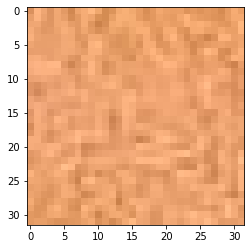

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph4, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph4 = np.array(AE_image_crop_test_ph4)
np_AE_image_crop_test_ph4 = np_AE_image_crop_test_ph4.reshape(1, 32, 32, 3)

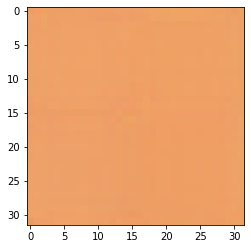

In [ ]:
np_AE_image_crop_test_ph4_norm = np_AE_image_crop_test_ph4 / 255

AE_test_ph4 = autoencoder.predict(np_AE_image_crop_test_ph4_norm)

# print(AE_test_ph12)
AE_test_ph4 = AE_test_ph4.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph4, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph4 = encoder_bottleneck.predict(np_AE_image_crop_test_ph4_norm)
print(bottleneck_ph4)

[[-0.25451863 -0.32423687]]


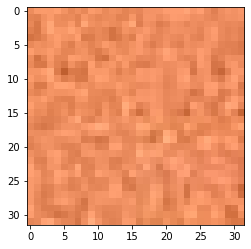

In [ ]:

# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph3, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph3 = np.array(AE_image_crop_test_ph3)
np_AE_image_crop_test_ph3 = np_AE_image_crop_test_ph3.reshape(1, 32, 32, 3)

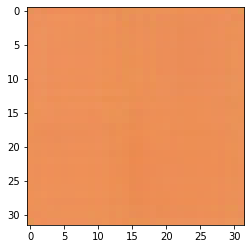

In [ ]:
np_AE_image_crop_test_ph3_norm = np_AE_image_crop_test_ph3 / 255

AE_test_ph3 = autoencoder.predict(np_AE_image_crop_test_ph3_norm)

# print(AE_test_ph12)
AE_test_ph3 = AE_test_ph3.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph3, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph3 = encoder_bottleneck.predict(np_AE_image_crop_test_ph3_norm)
print(bottleneck_ph3)

[[-0.24026853 -0.31995076]]


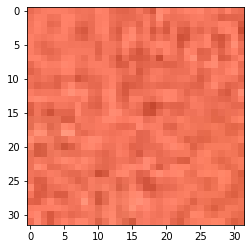

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph2, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)

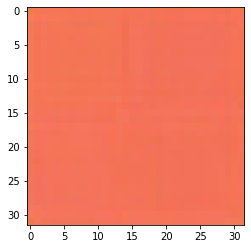

In [ ]:
np_AE_image_crop_test_ph2_norm = np_AE_image_crop_test_ph2 / 255

AE_test_ph2 = autoencoder.predict(np_AE_image_crop_test_ph2_norm)

# print(AE_test_ph12)
AE_test_ph2 = AE_test_ph2.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph2, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph2 = encoder_bottleneck.predict(np_AE_image_crop_test_ph2_norm)
print(bottleneck_ph2)

[[-0.2279189  -0.31600282]]


### (testing) AE Decode Image

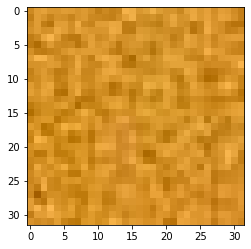

In [ ]:
for i in range(3):
  plt.imshow(cv2.cvtColor(test_X[], cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
AE_image_crop_test_ph12 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg")

AE_image_crop_test_ph2 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/ph2_10.jpg")

AE_image_crop_test_ph8 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/8/ph8_10.jpg")

(1, 32, 32, 3)


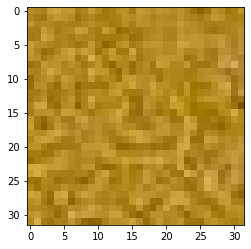

In [ ]:
plt.imshow(AE_image_crop_test_ph12)

# img = cv2.imread('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg')
# np_AE_image_crop_test_ph12 = np.array(img)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)
np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)


In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg')
np_AE_image_crop_test_ph12 = np.array(img)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)

(1, 32, 32, 3)


In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255

In [ ]:
AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)

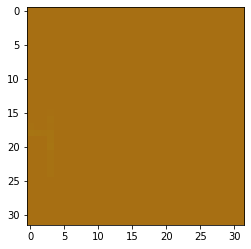

In [ ]:
# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

(1, 32, 32, 3)


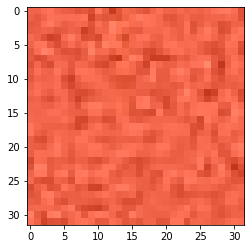

In [ ]:
plt.imshow(AE_image_crop_test_ph2)
# img = cv2.imread("/content/gdrive/MyDrive/NCHU/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_56_56/2/ph2_10.jpg")
# res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
# res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph2.shape)

In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255
np_AE_image_crop_test_ph2_norm = np_AE_image_crop_test_ph2 / 255

In [ ]:
AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)
AE_test_ph2 = autoencoder.predict(np_AE_image_crop_test_ph2_norm)
AE_test_ph12.shape
AE_test_ph2.shape

(1, 32, 32, 3)

In [ ]:
aa = ( AE_test_ph12 - np.min(AE_test_ph12) ) * 255 / ( np.max(AE_test_ph12) - np.min(AE_test_ph12) )

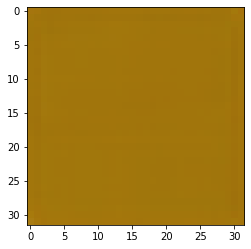

In [ ]:
# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
plt.imshow(AE_test_ph12)
# plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

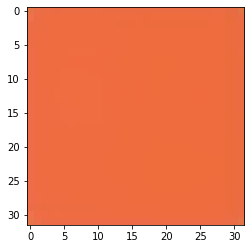

In [ ]:
# print(AE_test_2)
AE_test_ph2 = AE_test_ph2.reshape(32, 32, 3)
plt.imshow(AE_test_ph2)
# plt.imshow(cv2.cvtColor(AE_test_ph2, cv2.COLOR_BGR2RGB))

In [ ]:
train_X_2.shape

(4696, 32, 32, 3)

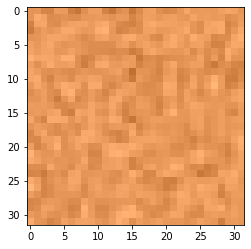

In [ ]:
plt.imshow(train_X_2[0])

In [ ]:
train_np_ds.shape

(4696, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


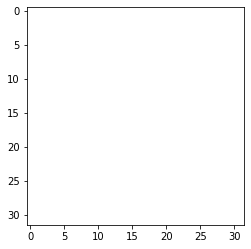

In [ ]:
plt.imshow(train_np_ds[0])

### AE Classifier

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[1])  # +2 to PH value 
print('After conversion to one-hot:', train_Y_one_hot[1])
print(train_y[:10])

Original label: [4]
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[10]
 [ 4]
 [ 1]
 [ 4]
 [ 9]
 [ 3]
 [ 9]
 [ 2]
 [ 8]
 [ 7]]


In [ ]:
num_classes = 11
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    print(out.shape)
    return out

# activation='softmax' activation='sigmoid

In [ ]:
# batch_size = 32
# epochs = 30
# inChannel = 3
# x, y = 32, 32
# input_img = Input(shape = (x, y, inChannel))

In [ ]:
encode = encoder_bottleneck(input_img)
full_model = Model(input_img, fc(encode))

(None, 11)


In [ ]:
encode.shape

TensorShape([None, 2])

In [ ]:
# full_model.compile(optimizer='adam',
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])


# compile model
full_model.compile(loss = keras.losses.mse, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4) ,metrics=['accuracy'])

In [ ]:
full_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 model_1 (Functional)        (None, 2)                 95682     
                                                                 
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 11)                1419      
                                                                 
Total params: 97,485
Trainable params: 96,781
Non-trainable params: 704
_________________________________________________________________


In [ ]:
history_classify = full_model.fit(train_X, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
118/118 [==============================] - 2s 10ms/step - loss: 0.0753 - accuracy: 0.2298 - val_loss: 0.0868 - val_accuracy: 0.0820
Epoch 2/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0654 - accuracy: 0.3395 - val_loss: 0.0852 - val_accuracy: 0.0927
Epoch 3/100
118/118 [==============================] - 1s 7ms/step - loss: 0.0585 - accuracy: 0.4052 - val_loss: 0.0714 - val_accuracy: 0.2822
Epoch 4/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0482 - accuracy: 0.5863 - val_loss: 0.0645 - val_accuracy: 0.4121
Epoch 5/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0434 - accuracy: 0.6459 - val_loss: 0.0425 - val_accuracy: 0.6624
Epoch 6/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0395 - accuracy: 0.6816 - val_loss: 0.0406 - val_accuracy: 0.6656
Epoch 7/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0358 - accuracy: 0.7181 - val_loss: 0.0397 - val_accuracy: 0.659

### Save classifier model

In [ ]:
full_model.save("/content/PEPE_AE_2_FC.h5")
files.download('/content/PEPE_AE_2_FC.h5')

joblib.dump(history_classify, '/content/PEPE_AE_FC_train_history_2')
files.download('/content/PEPE_AE_FC_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load AE classifier model

In [15]:
full_model = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_model/0926/PEPE_AE_2_FC.h5')
history_classify = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_model/0926/PEPE_AE_FC_train_history_2')

# full_model = load_model('/content/PEPE_AE_2_FC.h5')
# history_classify = joblib.load('/content/PEPE_AE_FC_train_history_2')

### Evaluate classifier model

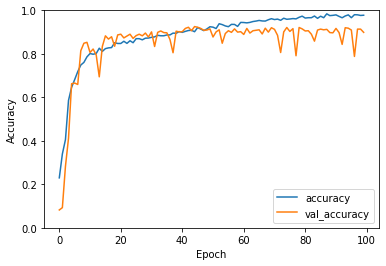

In [11]:
plt.plot(history_classify.history['accuracy'], label='accuracy')
plt.plot(history_classify.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_eval = full_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', round(test_eval[0], 4))
print('Test accuracy:', round(test_eval[1], 4))

Test loss: 0.0126
Test accuracy: 0.8969


In [ ]:
pre_img_test = full_model.predict(test_X)
pre_img_train = full_model.predict(train_X)

In [ ]:
test_X.shape

(1174, 32, 32, 3)

In [ ]:
pre_img_test[0].shape
print(pre_img_test[0])
print(np.max(pre_img_test[0]))
print(np.argmax(pre_img_test[0]))
print(np.sum(pre_img_test[0]))

[1.0611735e-32 1.1213124e-28 6.6727771e-18 3.5387442e-22 2.5142681e-24
 4.6403153e-24 2.4223794e-24 4.7540683e-11 1.3945975e-04 2.3744517e-04
 9.9962306e-01]
0.99962306
10
0.99999994


In [ ]:
pre_img = np.argmax(np.round(pre_img_test),axis=1)
pre_img.shape

(1174,)

In [ ]:
pre_img[4], test_y[4]

(5, array([5]))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pre_img))
print(classification_report(test_y, pre_img))

[[108   0   0   0   0   0   0   0   0   0   0]
 [  6 100   0   0   0   0   0   0   0   0   0]
 [  0   0 115   0   0   0   0   0   0   0   0]
 [  0   0   0  94   4   0   0   0   0   0   0]
 [  0   0   0   7 110   0   0   0   0   0   0]
 [  0   0   0   0   0 120   0   0   0   0   0]
 [ 10   0   0   0   1   0  77  27   0   0   0]
 [  9   0   0   0   0   0  31  62   0   0   0]
 [  6   0   0   0   0   0   3  10  79   0   1]
 [  7   0   1   0   0   1   0   0   0  87   8]
 [  1   0   0   0   0   0   0   0   1   1  87]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       108
           1       1.00      0.94      0.97       106
           2       0.99      1.00      1.00       115
           3       0.93      0.96      0.94        98
           4       0.96      0.94      0.95       117
           5       0.99      1.00      1.00       120
           6       0.69      0.67      0.68       115
           7       0.63      0.61      0.62      

Text(33.0, 0.5, 'True Label')

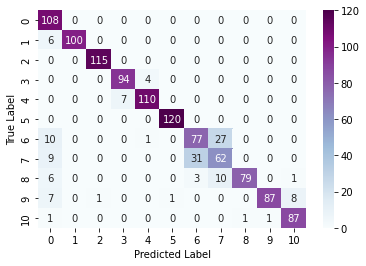

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pre_img)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### AE_2dim plot

In [17]:
encoded_data = encoder_bottleneck.predict(test_X)
encoded_data.shape

(1174, 2)

In [18]:
encoded_data_pred_2 = pd.DataFrame(data = encoded_data
             , columns = ['principal component 1', 'principal component 2'])
encoded_data_pred_2['label'] = test_y + 2

In [19]:
encoded_data_pred_2.head()

,principal component 1,principal component 2,label
0,-8.481462,-8.280881,10
1,1.395140,-10.966635,11
2,-8.292787,-35.991734,12
3,-19.847679,-5.215663,9
4,20.517914,-13.230846,4


In [ ]:
encoded_data_pred_2_normilize = (encoded_data_pred_2.iloc[:,:-1] - np.min(encoded_data_pred_2.iloc[:,:-1])) / (np.max(encoded_data_pred_2.iloc[:,:-1]) - np.min(encoded_data_pred_2.iloc[:,:-1])) * 100

In [ ]:
encoded_data_pred_2_norm = pd.DataFrame(data = encoded_data_pred_2_normilize
             , columns = ['principal component 1', 'principal component 2'])
encoded_data_pred_2_norm['label'] = test_y + 2

In [ ]:
encoded_data_pred_2_norm

,principal component 1,principal component 2,label
0,21.708475,84.260002,2
1,45.160820,60.011089,9
2,44.552521,78.940475,7
3,20.601377,68.092758,3
4,22.941954,44.408245,10
...,...,...,...
1169,47.495346,44.478027,4
1170,23.812866,80.181969,2
1171,36.293331,65.383606,7
1172,14.670984,53.604061,8


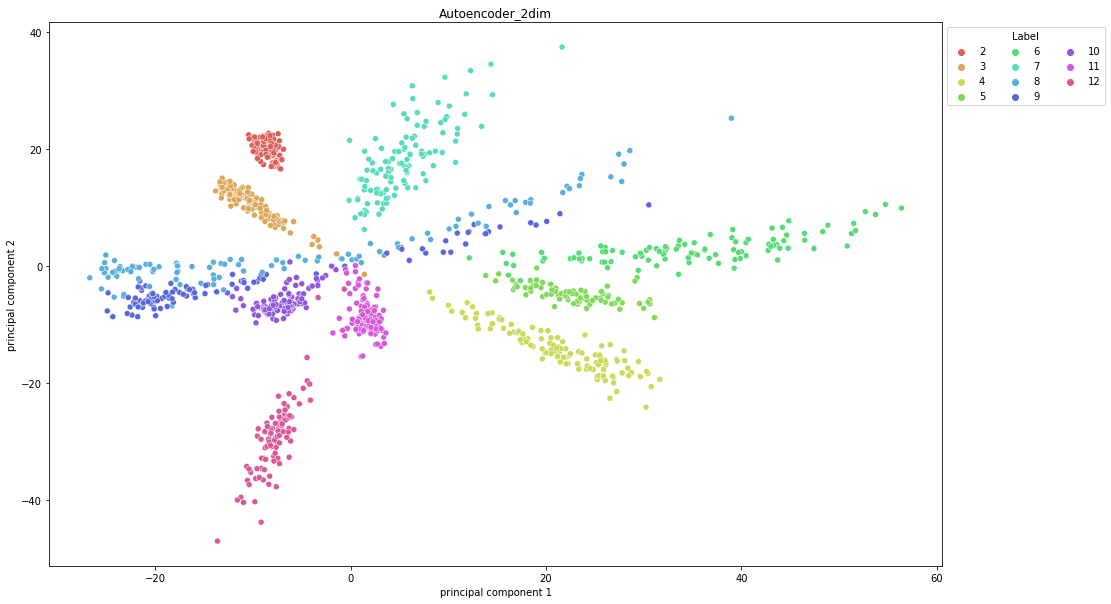

In [21]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= encoded_data_pred_2,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### AE_mean plot

In [25]:
encoded_data_pred_2.iloc[:,:-1]

,principal component 1,principal component 2
0,-8.481462,-8.280881
1,1.395140,-10.966635
2,-8.292787,-35.991734
3,-19.847679,-5.215663
4,20.517914,-13.230846
...,...,...
1169,-8.784650,7.617323
1170,-10.481227,9.817955
1171,8.180932,4.526208
1172,-11.608397,-40.081608


In [26]:
encoded_data_pred_2.iloc[:,2:3]

,label
0,10
1,11
2,12
3,9
4,4
...,...
1169,3
1170,3
1171,8
1172,12


In [27]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(np.array(encoded_data_pred_2), np.array(encoded_data_pred_2.iloc[:,2:3])):
  # print(l.shape)
  if l[0] == 2:
    class2.append([t[0], t[1], l[0]])
  elif l[0] == 3:
    class3.append([t[0], t[1], l[0]])
  elif l[0] == 4:
    class4.append([t[0], t[1], l[0]])
  elif l[0] == 5:
    class5.append([t[0], t[1], l[0]])
  elif l[0] == 6:
    class6.append([t[0], t[1], l[0]])
  elif l[0] == 7:
    class7.append([t[0], t[1], l[0]])
  elif l[0] == 8:
    class8.append([t[0], t[1], l[0]])    
  elif l[0] == 9:
    class9.append([t[0], t[1], l[0]])
  elif l[0] == 10:
    class10.append([t[0], t[1], l[0]])
  elif l[0] == 11:
    class11.append([t[0], t[1], l[0]])
  elif l[0] == 12:
    class12.append([t[0], t[1], l[0]])


In [28]:
number_of_elements = len(class12)
print("Number of elements in the list: ", number_of_elements)

Number of elements in the list:  96


In [29]:
mean_x_AE = [
    np.mean(np.array(class2)[:,:1]),
    np.mean(np.array(class3)[:,:1]),
    np.mean(np.array(class4)[:,:1]),
    np.mean(np.array(class5)[:,:1]),
    np.mean(np.array(class6)[:,:1]),
    np.mean(np.array(class7)[:,:1]),
    np.mean(np.array(class8)[:,:1]),
    np.mean(np.array(class9)[:,:1]),
    np.mean(np.array(class10)[:,:1]),
    np.mean(np.array(class11)[:,:1]),
    np.mean(np.array(class12)[:,:1]),
] 
print(mean_x_AE)

[-8.500258326530457, -9.884828784163036, 21.53761257613001, 22.831609784103023, 34.792359030976584, 5.446502638033085, -5.53570328269686, -11.105582587789781, -6.920823914510709, 1.5401209422611986, -7.6968048842002945]


In [30]:
mean_XX_AE = np.mean(mean_x_AE)
print(mean_XX_AE)

3.3185639265102505


In [31]:
mean_y_AE = [
    np.mean(np.array(class2)[:,1:2]),
    np.mean(np.array(class3)[:,1:2]),
    np.mean(np.array(class4)[:,1:2]),
    np.mean(np.array(class5)[:,1:2]),
    np.mean(np.array(class6)[:,1:2]),
    np.mean(np.array(class7)[:,1:2]),
    np.mean(np.array(class8)[:,1:2]),
    np.mean(np.array(class9)[:,1:2]),
    np.mean(np.array(class10)[:,1:2]),
    np.mean(np.array(class11)[:,1:2]),
    np.mean(np.array(class12)[:,1:2]),
] 
print(mean_y_AE)

[20.264305628263035, 10.37995656804433, -14.41966382334055, -4.799070940875426, 2.8985512329987726, 18.184184785474812, 2.939119303155513, -2.7156085291932714, -6.091864306882426, -8.824909038327892, -29.314084380865097]


In [32]:
mean_YY_AE = np.mean(mean_y_AE)
print(mean_YY_AE)

-1.0453712274134723


In [33]:
AE_mean_ph = pd.DataFrame(data = zip(mean_x_AE, mean_y_AE)
             , columns = ['principal component 1', 'principal component 2'])
AE_mean_ph['label'] = AE_mean_ph.index + 2

print(round(AE_mean_ph, 4))

    principal component 1  principal component 2  label
0                 -8.5003                20.2643      2
1                 -9.8848                10.3800      3
2                 21.5376               -14.4197      4
3                 22.8316                -4.7991      5
4                 34.7924                 2.8986      6
5                  5.4465                18.1842      7
6                 -5.5357                 2.9391      8
7                -11.1056                -2.7156      9
8                 -6.9208                -6.0919     10
9                  1.5401                -8.8249     11
10                -7.6968               -29.3141     12


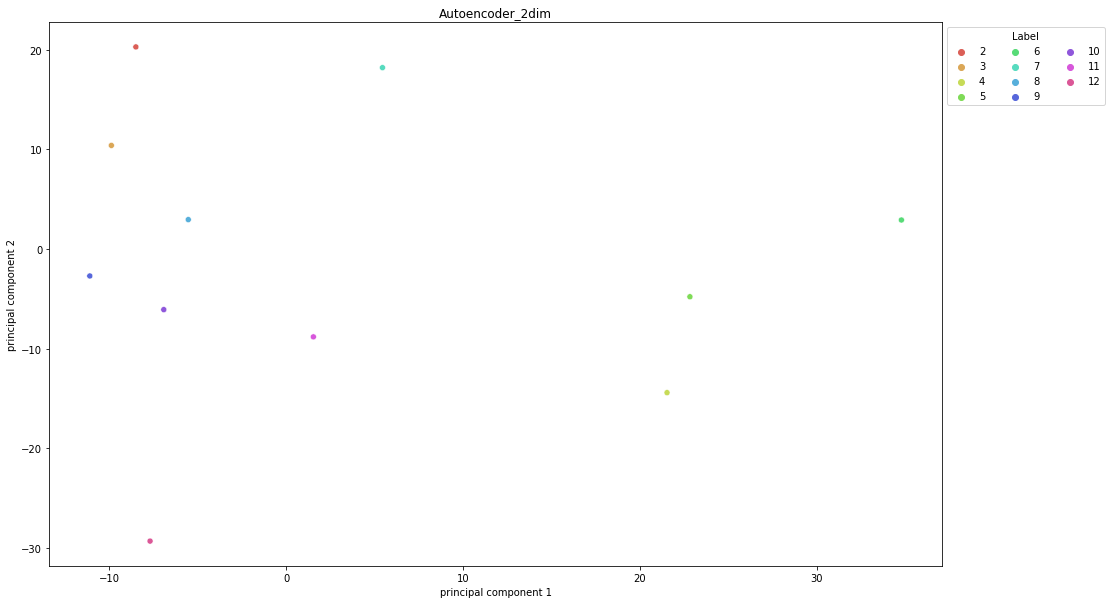

In [34]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= AE_mean_ph,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### Between class & Within class

In [37]:
encoded_data_pred_2.iloc[:,:]

,principal component 1,principal component 2,label
0,-8.481462,-8.280881,10
1,1.395140,-10.966635,11
2,-8.292787,-35.991734,12
3,-19.847679,-5.215663,9
4,20.517914,-13.230846,4
...,...,...,...
1169,-8.784650,7.617323,3
1170,-10.481227,9.817955,3
1171,8.180932,4.526208,8
1172,-11.608397,-40.081608,12


In [38]:
class_feature_means_AE = pd.DataFrame()
for c, rows in encoded_data_pred_2.groupby('label'):
    class_feature_means_AE[c] = rows.mean()
class_feature_means_AE

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-8.500257,-9.884827,21.537611,22.831604,34.792362,5.446502,-5.535703,-11.105582,-6.920822,1.540121,-7.696804
principal component 2,20.264305,10.379959,-14.419667,-4.799071,2.898551,18.184185,2.939120,-2.715608,-6.091864,-8.824909,-29.314085
label,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000


In [39]:
class_feature_means_AE.iloc[:-1,:]

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-8.500257,-9.884827,21.537611,22.831604,34.792362,5.446502,-5.535703,-11.105582,-6.920822,1.540121,-7.696804
principal component 2,20.264305,10.379959,-14.419667,-4.799071,2.898551,18.184185,2.939120,-2.715608,-6.091864,-8.824909,-29.314085


In [40]:
print(mean_XX_AE, mean_YY_AE)

3.3185639265102505 -1.0453712274134723


In [41]:
aa = class_feature_means_AE.iloc[:1,:] - mean_XX_AE
bb = class_feature_means_AE.iloc[1:2,:] - mean_YY_AE

In [42]:
aa
bb

,2,3,4,5,6,7,8,9,10,11,12
principal component 2,21.309676,11.42533,-13.374296,-3.7537,3.943922,19.229556,3.984491,-1.670237,-5.046492,-7.779538,-28.268714


In [43]:
A = np.array(aa*aa)
B = np.array(bb*bb)

In [44]:
num_sqrt = np.sqrt(A+B)
# print(num_sqrt)|

between_class_AE = np.sum(num_sqrt) / 11

print("{:.4f}".format(between_class_AE)) 

19.0301


In [ ]:
all_class_AE = [class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12]

sum2 = 0
for m in range(0, 11):
  print("\n ph ", m+2)
  sum = 0
  for i, (x, y, _) in enumerate(all_class_AE[m]):

    sum += np.sqrt((x - class_feature_means_AE.iloc[0,m])**2 + (y - class_feature_means_AE.iloc[1,m])**2)
    # print(np.sqrt((x - class_feature_means_AE.iloc[0,m])**2 + (y - class_feature_means_AE.iloc[1,m])**2))
    print(x, y, np.array(class_feature_means_AE.iloc[:2,m]))

  sum = sum/(i+1)

  sum2 += sum
  print(i+1)
  print(sum)

within_class_AE = sum2/11
print("{:.4f}".format(within_class_AE)) 

In [46]:
print("{:.4f}".format(within_class_AE))

5.9692


In [47]:
print("{:.4f}".format(between_class_AE / within_class_AE)) 

3.1881


In [ ]:

x, y, _ = class2[0]

testsum = np.sqrt((x - class_feature_means.iloc[0,0])**2 + (y - class_feature_means.iloc[1,0])**2)
print(x, y, np.array(class_feature_means.iloc[:2,0]))

print(testsum)



0.19626385 -0.022941753 [ 0.20877524 -0.02670655]
0.013065545712903116


## PCA

In [48]:
import pandas as pd
from sklearn.decomposition import PCA

### verify train data

In [ ]:
print('Traning data shape:', train_X.shape)
print('Testing data shape:', test_X.shape)

Traning data shape: (4695, 32, 32, 3)
Testing data shape: (1174, 32, 32, 3)


In [ ]:
train_y.shape, test_y.shape

((4695, 1), (1174, 1))

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  11
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
label_dict = {
 0: 'PH2',
 1: 'PH3',
 2: 'PH4',
 3: 'PH5',
 4: 'PH6',
 5: 'PH7',
 6: 'PH8',
 7: 'PH9',
 8: 'PH10',
 9: 'PH11',
 10: 'PH12',
}

Text(0.5, 1.0, '(Label: PH2)')
Text(0.5, 1.0, '(Label: PH4)')


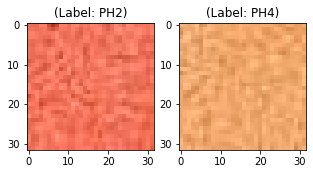

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_X[0], (32,32,3))

plt.imshow(cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB))
# plt.imshow(curr_img)

print(plt.title("(Label: " + str(label_dict[train_y[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_X[0],(32,32,3))

plt.imshow(cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB))
# plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[test_y[0][0]]) + ")"))

### Data Preprocessing


In [49]:
np.min(train_X),np.max(train_X)
np.min(test_X),np.max(test_X)

(0.0, 1.0)

In [50]:
x_train = train_X/255.0
np.min(x_train),np.max(x_train)

x_test = test_X/255.0
np.min(x_test),np.max(x_test)

(0.0, 0.003921569)

In [51]:
x_train.shape, x_test.shape

((4695, 32, 32, 3), (1174, 32, 32, 3))

In [52]:
x_train_flat = x_train.reshape(-1,3072)
x_test_flat = x_test.reshape(-1,3072)
x_train_flat.shape, x_test_flat.shape

((4695, 3072), (1174, 3072))

In [53]:
feat_cols_train = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
feat_cols_test = ['pixel'+str(i) for i in range(x_test_flat.shape[1])]

In [54]:
df_dataset_train = pd.DataFrame(x_train_flat, columns=feat_cols_train)
df_dataset_test = pd.DataFrame(x_test_flat, columns=feat_cols_test)

In [55]:
df_dataset_train['label'] = train_y
print('Size of the dataframe: {}'.format(df_dataset_train.shape))

df_dataset_test['label'] = test_y
print('Size of the dataframe: {}'.format(df_dataset_test.shape))

Size of the dataframe: (4695, 3073)
Size of the dataframe: (1174, 3073)


In [56]:
# df_dataset_train.head()
df_dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.000600,0.002338,0.003306,0.000554,0.002245,0.003230,0.000062,0.001722,0.002707,0.000246,...,0.000062,0.001630,0.002630,0.000323,0.001892,0.002891,0.000830,0.002399,0.003399,8
1,0.000538,0.001984,0.002799,0.000523,0.001968,0.002784,0.000000,0.001246,0.002061,0.000538,...,0.000769,0.002322,0.003122,0.000415,0.001968,0.002768,0.000507,0.002076,0.002876,9
2,0.001015,0.002537,0.003122,0.001230,0.002784,0.003368,0.001015,0.002614,0.003183,0.000861,...,0.000877,0.002630,0.003199,0.000600,0.002307,0.002891,0.001077,0.002784,0.003368,10
3,0.000461,0.002138,0.003183,0.000292,0.001968,0.003014,0.000431,0.002107,0.003153,0.000000,...,0.000200,0.001907,0.002953,0.000523,0.002230,0.003276,0.000384,0.002092,0.003137,7
4,0.001938,0.002753,0.003783,0.001845,0.002661,0.003691,0.001907,0.002722,0.003752,0.001907,...,0.002168,0.002968,0.003922,0.002153,0.002953,0.003922,0.001922,0.002722,0.003737,2


In [57]:
df_dataset_test.shape

(1174, 3073)

### PCA fit transform

In [58]:
df_dataset_train.iloc[:,:-1].shape

(4695, 3072)

In [59]:
pca_dataset_train_2 = PCA(n_components=2)
# pca_dataset_train_2.fit(df_dataset_train.iloc[:,:-1])
pca_dataset_train_2.fit(x_train_flat)
# principalComponents_ds_test_pred_2 = pca_dataset_train_2.transform(df_dataset_test.iloc[:,:-1])
principalComponents_ds_test_pred_2 = pca_dataset_train_2.transform(x_test_flat)

In [60]:
principalComponents_ds_test_pred_2.shape

(1174, 2)

In [61]:
principal_ds_Df_pred_2 = pd.DataFrame(data = principalComponents_ds_test_pred_2
             , columns = ['principal component 1', 'principal component 2'])
principal_ds_Df_pred_2['label'] = test_y + 2

In [70]:
principal_ds_Df_pred_2.head()

,principal component 1,principal component 2,label
0,0.031602,0.001303,10
1,0.036059,-0.001848,11
2,0.012278,-0.009623,12
3,0.025732,0.001852,9
4,-0.024969,-0.000374,4


In [63]:
principal_ds_Df_pred_2.shape

(1174, 3)

In [64]:
principal_ds_Df_pred_2_normilize = (principal_ds_Df_pred_2.iloc[:,:-1] - np.min(principal_ds_Df_pred_2.iloc[:,:-1])) / (np.max(principal_ds_Df_pred_2.iloc[:,:-1]) - np.min(principal_ds_Df_pred_2.iloc[:,:-1])) * 100

In [65]:
principal_ds_Df_pred_2_norm = pd.DataFrame(data = principal_ds_Df_pred_2_normilize
             , columns = ['principal component 1', 'principal component 2'])
principal_ds_Df_pred_2_norm['label'] = test_y + 2

In [66]:
principal_ds_Df_pred_2_norm

,principal component 1,principal component 2,label
0,81.845245,35.456131,10
1,87.008453,28.325918,11
2,59.458447,10.734241,12
3,75.045425,36.698521,9
4,16.308874,31.660990,4
...,...,...,...
1169,21.209980,44.332401,3
1170,39.914154,59.140194,3
1171,43.548050,23.561337,8
1172,60.754005,11.535403,12


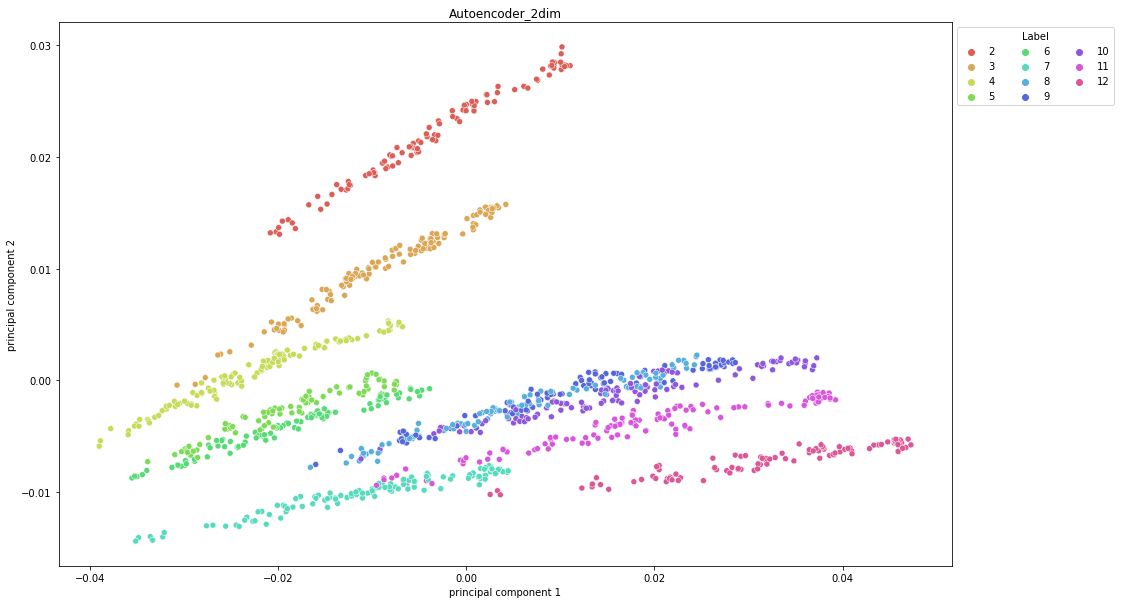

In [71]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= principal_ds_Df_pred_2,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

[Text(0.5, 1.0, 'PCA_train_2dim')]

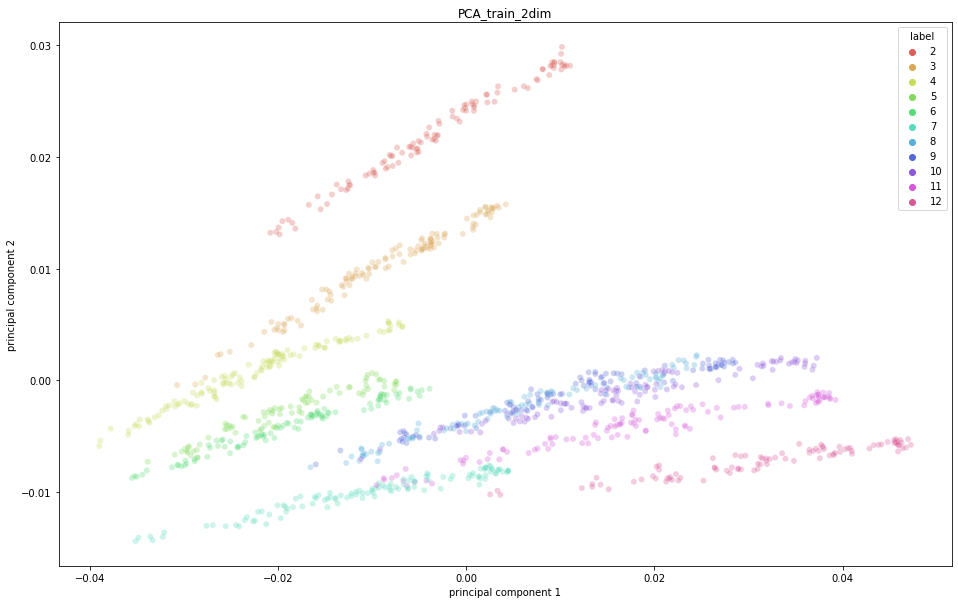

In [68]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= principal_ds_Df_pred_2,
    legend="full",
    alpha=0.3,
).set(title='PCA_train_2dim')


有两个PCA类的成员值得关注。第一个是explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。第二个是explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。

In [69]:
print("各主成分方向：\n",pca_dataset_train_2.components_.shape)
print('Explained variation per principal component: {}'.format(pca_dataset_train_2.explained_variance_ratio_))
print(format(pca_dataset_train_2.explained_variance_))
print(format(pca_dataset_train_2.singular_values_))

各主成分方向：
 (2, 3072)
Explained variation per principal component: [0.65076524 0.13762316]
[3.8973455e-04 8.2420658e-05]
[1.3525583  0.62199885]


### PCA_mean plot

In [72]:
principal_ds_Df_pred_2.iloc[:,:-1]

,principal component 1,principal component 2
0,0.031602,0.001303
1,0.036059,-0.001848
2,0.012278,-0.009623
3,0.025732,0.001852
4,-0.024969,-0.000374
...,...,...
1169,-0.020739,0.005226
1170,-0.004593,0.011771
1171,-0.001456,-0.003954
1172,0.013396,-0.009269


In [73]:
principal_ds_Df_pred_2.iloc[:,2:3]

,label
0,10
1,11
2,12
3,9
4,4
...,...
1169,3
1170,3
1171,8
1172,12


In [74]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(np.array(principal_ds_Df_pred_2.iloc[:,:-1]), np.array(principal_ds_Df_pred_2.iloc[:,2:3])):
  # print(l.shape)
  if l[0] == 2:
    class2.append([t[0], t[1], l[0]])
  elif l[0] == 3:
    class3.append([t[0], t[1], l[0]])
  elif l[0] == 4:
    class4.append([t[0], t[1], l[0]])
  elif l[0] == 5:
    class5.append([t[0], t[1], l[0]])
  elif l[0] == 6:
    class6.append([t[0], t[1], l[0]])
  elif l[0] == 7:
    class7.append([t[0], t[1], l[0]])
  elif l[0] == 8:
    class8.append([t[0], t[1], l[0]])    
  elif l[0] == 9:
    class9.append([t[0], t[1], l[0]])
  elif l[0] == 10:
    class10.append([t[0], t[1], l[0]])
  elif l[0] == 11:
    class11.append([t[0], t[1], l[0]])
  elif l[0] == 12:
    class12.append([t[0], t[1], l[0]])


In [75]:
number_of_elements = len(class12)
print("Number of elements in the list: ", number_of_elements)

Number of elements in the list:  96


In [76]:
mean_x_PCA = [
    np.mean(np.array(class2)[:,:1]),
    np.mean(np.array(class3)[:,:1]),
    np.mean(np.array(class4)[:,:1]),
    np.mean(np.array(class5)[:,:1]),
    np.mean(np.array(class6)[:,:1]),
    np.mean(np.array(class7)[:,:1]),
    np.mean(np.array(class8)[:,:1]),
    np.mean(np.array(class9)[:,:1]),
    np.mean(np.array(class10)[:,:1]),
    np.mean(np.array(class11)[:,:1]),
    np.mean(np.array(class12)[:,:1]),
] 
print(mean_x_PCA)

[-0.0032590720585666043, -0.008723657820299859, -0.022419282265992695, -0.018824964608406512, -0.018781006060616702, -0.009991706625314373, 0.00593383529326058, 0.010882113537506781, 0.01703080523660541, 0.01838303337956012, 0.03222676220078332]


In [77]:
mean_XX_PCA = np.mean(mean_x_PCA)
print(mean_XX_PCA)

0.0002233509280472246


In [78]:
mean_y_PCA = [
    np.mean(np.array(class2)[:,1:2]),
    np.mean(np.array(class3)[:,1:2]),
    np.mean(np.array(class4)[:,1:2]),
    np.mean(np.array(class5)[:,1:2]),
    np.mean(np.array(class6)[:,1:2]),
    np.mean(np.array(class7)[:,1:2]),
    np.mean(np.array(class8)[:,1:2]),
    np.mean(np.array(class9)[:,1:2]),
    np.mean(np.array(class10)[:,1:2]),
    np.mean(np.array(class11)[:,1:2]),
    np.mean(np.array(class12)[:,1:2]),
] 
print(mean_y_PCA)

[0.022090335994457398, 0.010191961687052668, 0.0006882995110587698, -0.002739083312784404, -0.004149028756394412, -0.010028176834774121, -0.002454039667056696, -0.0012882518173619876, -0.001168256358158049, -0.004181485973370807, -0.007146690365819571]


In [79]:
mean_YY_PCA = np.mean(mean_y_PCA)
print(mean_YY_PCA)

-1.6765081195564818e-05


In [80]:
PCA_mean_ph = pd.DataFrame(data = zip(mean_x_PCA, mean_y_PCA)
             , columns = ['principal component 1', 'principal component 2'])
PCA_mean_ph['label'] = PCA_mean_ph.index + 2

print(round(PCA_mean_ph, 4))

    principal component 1  principal component 2  label
0                 -0.0033                 0.0221      2
1                 -0.0087                 0.0102      3
2                 -0.0224                 0.0007      4
3                 -0.0188                -0.0027      5
4                 -0.0188                -0.0041      6
5                 -0.0100                -0.0100      7
6                  0.0059                -0.0025      8
7                  0.0109                -0.0013      9
8                  0.0170                -0.0012     10
9                  0.0184                -0.0042     11
10                 0.0322                -0.0071     12


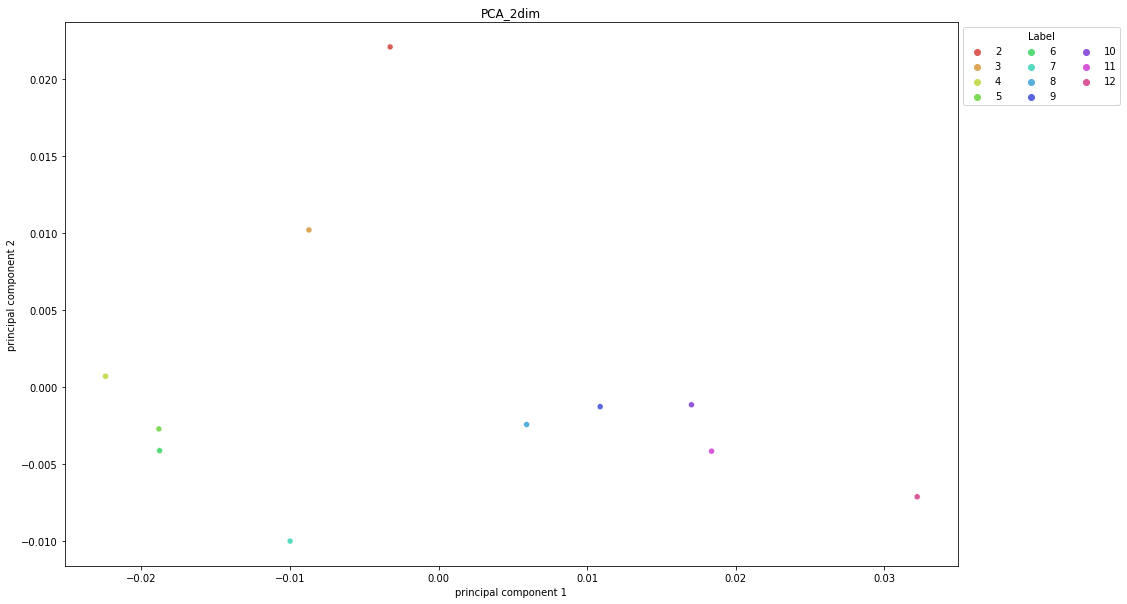

In [81]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= PCA_mean_ph,
    legend="full",
)
ax.set(title='PCA_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### Between class & Within class

In [82]:
principal_ds_Df_pred_2.iloc[:,:]

,principal component 1,principal component 2,label
0,0.031602,0.001303,10
1,0.036059,-0.001848,11
2,0.012278,-0.009623,12
3,0.025732,0.001852,9
4,-0.024969,-0.000374,4
...,...,...,...
1169,-0.020739,0.005226,3
1170,-0.004593,0.011771,3
1171,-0.001456,-0.003954,8
1172,0.013396,-0.009269,12


In [83]:
class_feature_means_PCA = pd.DataFrame()
for c, rows in principal_ds_Df_pred_2.groupby('label'):
    class_feature_means_PCA[c] = rows.mean()
class_feature_means_PCA

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-0.003259,-0.008724,-0.022419,-0.018825,-0.018781,-0.009992,0.005934,0.010882,0.017031,0.018383,0.032227
principal component 2,0.022090,0.010192,0.000688,-0.002739,-0.004149,-0.010028,-0.002454,-0.001288,-0.001168,-0.004181,-0.007147
label,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000


In [84]:
class_feature_means_PCA.iloc[:-1,:]

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,-0.003259,-0.008724,-0.022419,-0.018825,-0.018781,-0.009992,0.005934,0.010882,0.017031,0.018383,0.032227
principal component 2,0.022090,0.010192,0.000688,-0.002739,-0.004149,-0.010028,-0.002454,-0.001288,-0.001168,-0.004181,-0.007147


In [85]:
print(mean_XX_PCA, mean_YY_PCA)

0.0002233509280472246 -1.6765081195564818e-05


In [86]:
aa = class_feature_means_PCA.iloc[:1,:] - mean_XX_PCA
bb = class_feature_means_PCA.iloc[1:2,:] - mean_YY_PCA

In [87]:
aa
bb

,2,3,4,5,6,7,8,9,10,11,12
principal component 2,0.022107,0.010209,0.000705,-0.002722,-0.004132,-0.010011,-0.002437,-0.001271,-0.001151,-0.004165,-0.00713


In [88]:
A = np.array(aa*aa)
B = np.array(bb*bb)

In [89]:
num_sqrt = np.sqrt(A+B)
# print(num_sqrt)|

between_class_PCA = np.sum(num_sqrt) / 11

print("{:.4f}".format(between_class_PCA)) 

0.0179


In [90]:
all_class_PCA = [class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12]

sum2 = 0
for m in range(0, 11):
  # print("\n ph ", m+2)
  sum = 0
  for i, (x, y, _) in enumerate(all_class_PCA[m]):

    sum += np.sqrt((x - class_feature_means_PCA.iloc[0,m])**2 + (y - class_feature_means_PCA.iloc[1,m])**2)
    # print(np.sqrt((x - class_feature_means_PCA.iloc[0,m])**2 + (y - class_feature_means_PCA.iloc[1,m])**2))
    # print(x, y, np.array(class_feature_means_PCA.iloc[:2,m]))

  sum = sum/(i+1)

  sum2 += sum
  # print(i+1)
  # print(sum)

within_class_PCA = sum2/11
print("{:.4f}".format(within_class_PCA))

0.0085


In [91]:
print("{:.4f}".format(between_class_PCA / within_class_PCA))

2.0977


### PCA classifer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop

In [ ]:
x_train_flat.shape, x_test_flat.shape

((4695, 3072), (1174, 3072))

In [ ]:
pca_train = PCA(2)
pca_train.fit(x_train_flat)
train_img_pca = pca_train.transform(x_train_flat)

pca_test = PCA(2)
pca_test.fit(x_test_flat)
test_img_pca = pca_train.transform(x_test_flat)

In [ ]:
train_img_pca.shape, test_img_pca.shape

((4695, 2), (1174, 2))

In [ ]:
y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[1])  # +2 to PH value 
print('After conversion to one-hot:', train_Y_one_hot[1])
print(train_y[:10])

Original label: [4]
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[10]
 [ 4]
 [ 1]
 [ 4]
 [ 9]
 [ 3]
 [ 9]
 [ 2]
 [ 8]
 [ 7]]


In [ ]:
num_classes = 11
def fc(enco):
    
    print(f'enco : {enco}')
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    print(out.shape)
    return out

In [ ]:
input_img = Input(shape = (2))
full_model = Model(input_img, fc(input_img))
full_model.summary()

enco : KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
(None, 11)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 flatten_3 (Flatten)         (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 11)                1419      
                                                                 
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
full_model.compile(loss = keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-1) ,metrics=['accuracy'])

In [ ]:
history_classify = full_model.fit(train_img_pca, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 1.8214 - accuracy: 0.2985 - val_loss: 1.4993 - val_accuracy: 0.3727
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 1.1625 - accuracy: 0.5359 - val_loss: 1.0686 - val_accuracy: 0.5506
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.9128 - accuracy: 0.6587 - val_loss: 0.8656 - val_accuracy: 0.6880
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.7899 - accuracy: 0.6896 - val_loss: 0.7283 - val_accuracy: 0.6677
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.7282 - val_loss: 0.7308 - val_accuracy: 0.6709
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.7223 - val_loss: 0.6195 - val_accuracy: 0.7476
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.7420 - val_loss: 0.5815 - val_accuracy: 0.7838

### Save model

In [ ]:
from google.colab import files
import joblib
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
full_model.save("/content/PEPE_PCA_2.h5")
files.download('/content/PEPE_PCA_2.h5')

joblib.dump(history_classify, '/content/PEPE_PCA_train_history_2')
files.download('/content/PEPE_PCA_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###load PCA classfier model

In [ ]:
full_model = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_model/0926/PEPE_PCA_2.h5')
history_classify = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_model/0926/PEPE_PCA_train_history_2')

### Evaluate classify Model

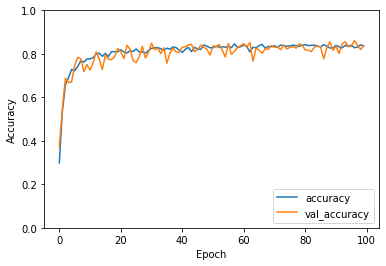

In [ ]:
plt.plot(history_classify.history['accuracy'], label='accuracy')
plt.plot(history_classify.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_eval = full_model.evaluate(test_img_pca, test_Y_one_hot, verbose=0)
print('Test loss:', round(test_eval[0], 4))
print('Test accuracy:', round(test_eval[1], 4))

Test loss: 0.3541
Test accuracy: 0.8186


In [ ]:
pre_img_test = full_model.predict(test_img_pca)
pre_img_train = full_model.predict(train_img_pca)

In [ ]:
pre_img_test[0].shape
print(pre_img_test[0])
print(np.max(pre_img_test[0]))
print(np.argmax(pre_img_test[0]))
print(np.sum(pre_img_test[0]))

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 7.1307854e-06 7.5118716e-28 9.3720951e-29 8.4302797e-20 6.4476531e-08
 9.9999273e-01]
0.9999927
10
0.99999994


In [ ]:
pre_img = np.argmax(np.round(pre_img_test),axis=1)
pre_img.shape

(1174,)

In [ ]:
pre_img[0], test_y[0]

(10, array([10]))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pre_img))
print(classification_report(test_y, pre_img))

[[108   0   0   0   0   0   0   0   0   0   0]
 [  0 103   3   0   0   0   0   0   0   0   0]
 [  0   0 115   0   0   0   0   0   0   0   0]
 [  0   0   0  84  14   0   0   0   0   0   0]
 [  0   0   0   4 113   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0  36   0]
 [ 53   0   0   0   0   0  21  31  10   0   0]
 [ 42   0   0   0   0   0   5  31  24   0   0]
 [ 34   0   0   0   0   0   4   3  58   0   0]
 [  0   0   0   0   0   1   0   0   0 103   0]
 [  0   0   0   0   0   0   0   0   0   0  90]]
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       108
           1       1.00      0.97      0.99       106
           2       0.97      1.00      0.99       115
           3       0.95      0.86      0.90        98
           4       0.89      0.97      0.93       117
           5       0.99      0.70      0.82       120
           6       0.70      0.18      0.29       115
           7       0.48      0.30      0.37      

Text(33.0, 0.5, 'True Label')

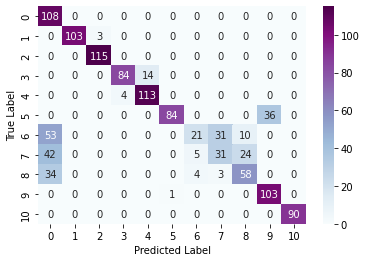

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pre_img)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')